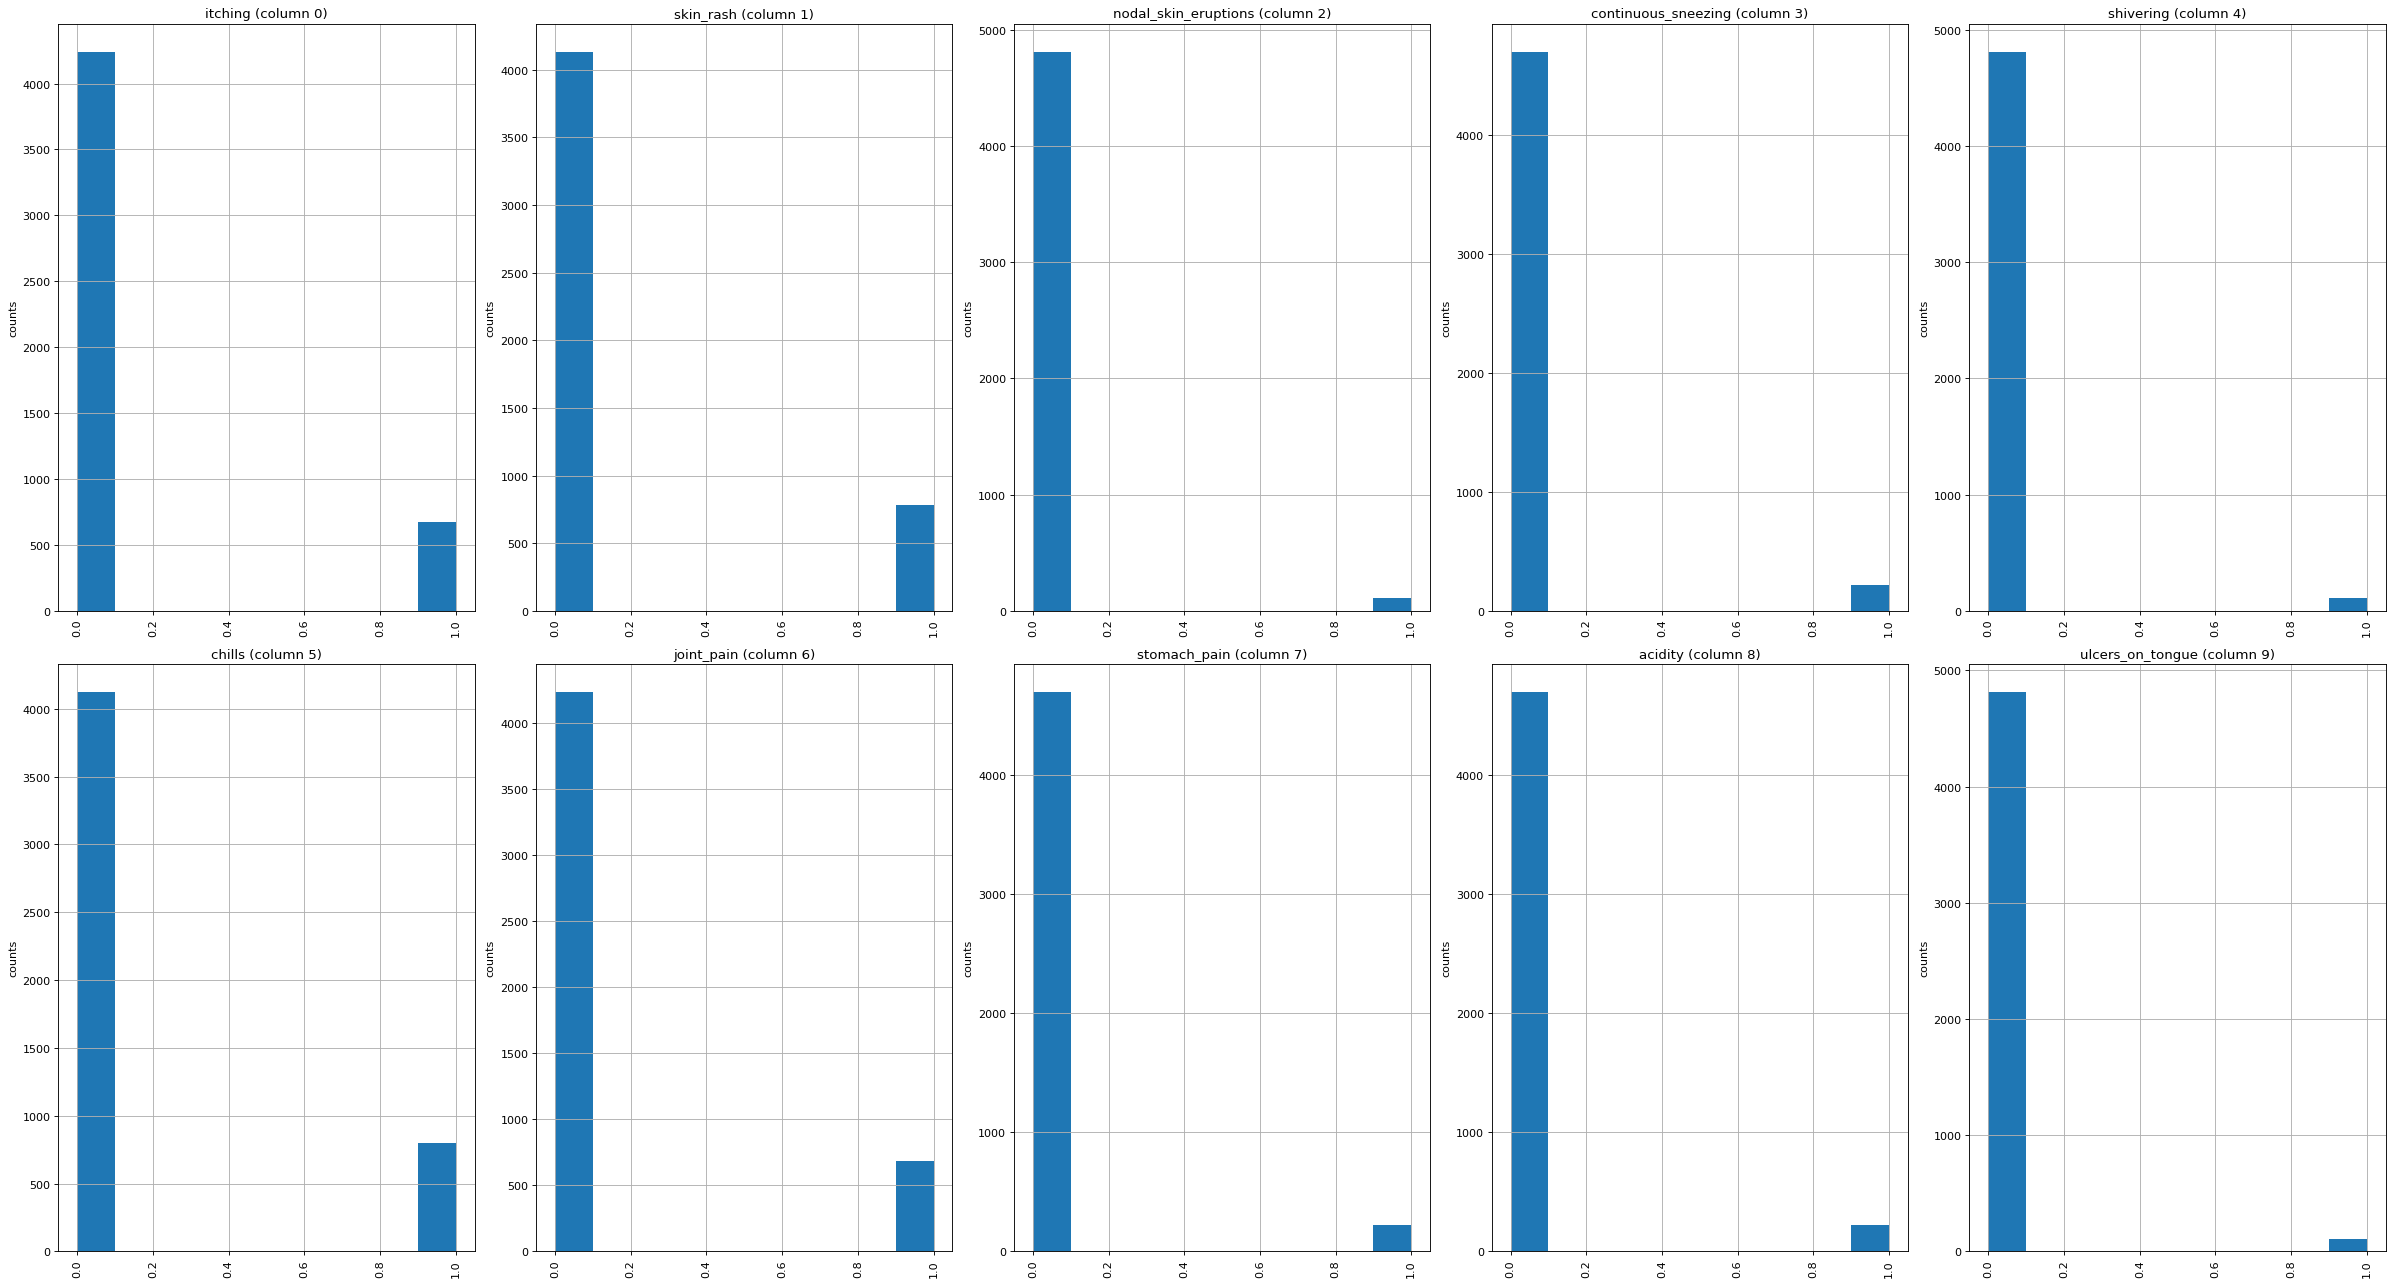

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13004\4008337449.py:102: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df1 = df1.dropna('columns')


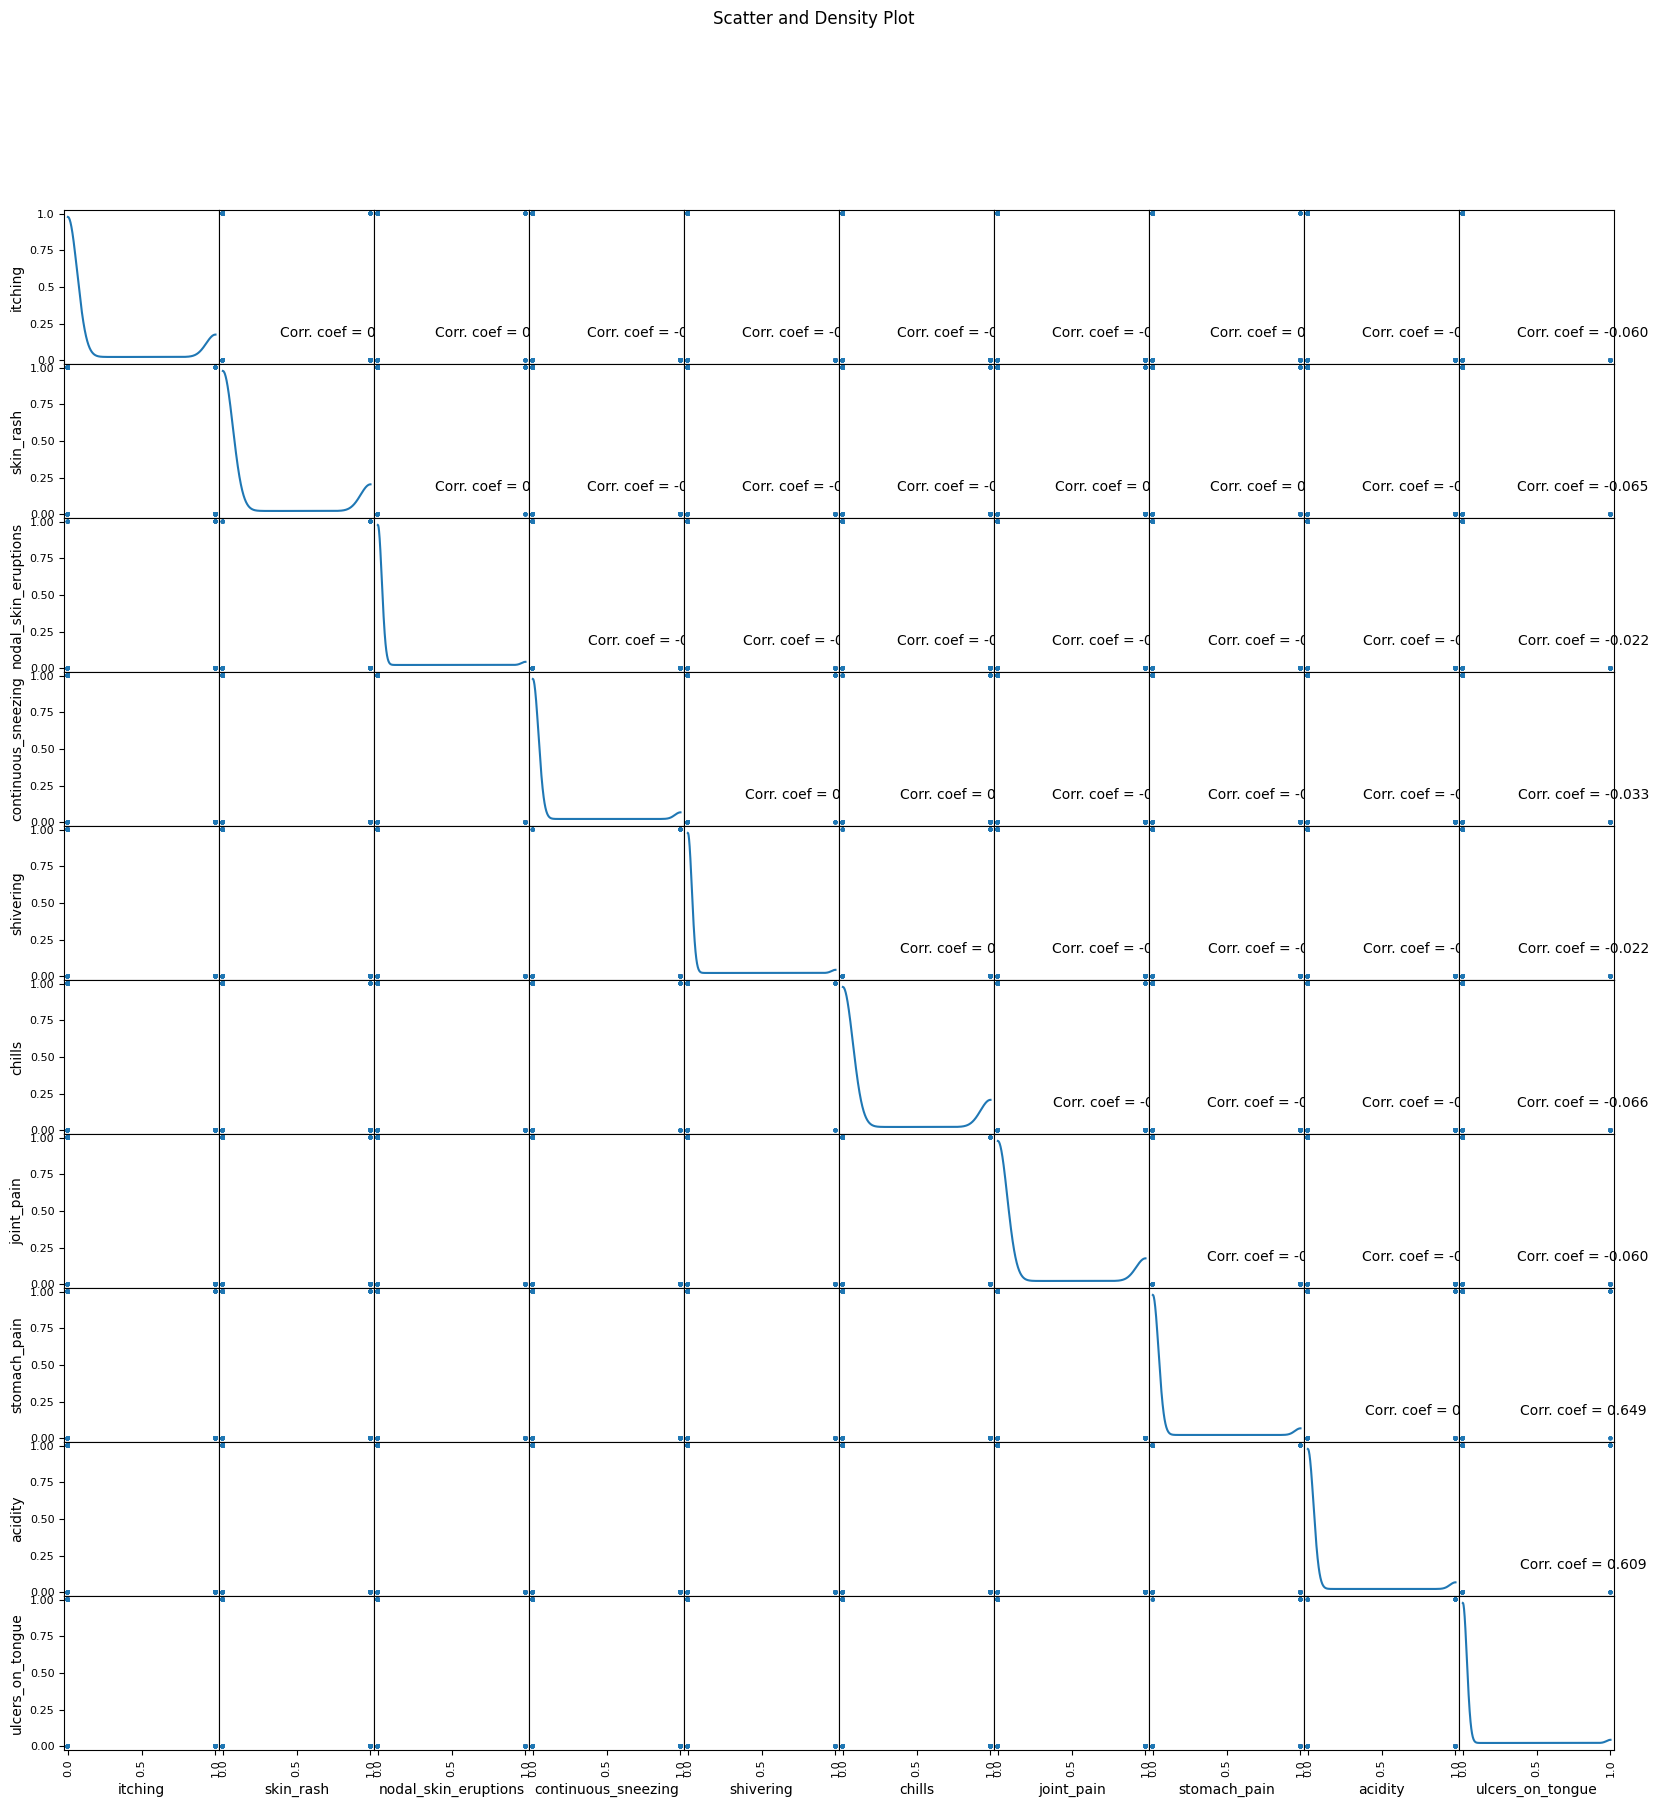

In [17]:
# cell 1
# Disease Prediction based on Symtoms
#Importing Libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pandas as pd
import os
from flask import Flask, request, jsonify
from flask_cors import CORS, cross_origin

app = Flask(__name__)
CORS(app, support_credentials=True)

#List of the symptoms is listed here in list l1.

l1=['back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine',
    'yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach',
    'swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs',
    'fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool',
    'irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs',
    'swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips',
    'slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints',
    'movement_stiffness','spinning_movements','loss_of_balance','unsteadiness',
    'weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine',
    'continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
    'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum',
    'rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
    'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen',
    'history_of_alcohol_consumption','fluid_overload','blood_in_sputum','prominent_veins_on_calf',
    'palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose',
    'yellow_crust_ooze']
#List of Diseases is listed in list disease.

disease=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

#disease = [df['prognosis'].unique()]
#print(disease)

l2=[]
for i in range(0,len(l1)):
    l2.append(0)
# print(l2)
#Reading the training .csv file
df=pd.read_csv("training.csv")
DF= pd.read_csv('training.csv', index_col='prognosis')
#Replace the values in the imported file by pandas by the inbuilt function replace in pandas.

df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
#df.head()
DF.head()
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
# Scatter and density plots
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna('columns')
    df1 = df1[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# plotPerColumnDistribution(df, 10, 5)
# plotScatterMatrix(df, 20, 10)
X= df[l1]
y = df[["prognosis"]]
np.ravel(y)
# print(X)
# print(y)
#Reading the  testing.csv file
tr=pd.read_csv("testing.csv")

#Using inbuilt function replace in pandas for replacing the values

tr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
tr.head()
# plotPerColumnDistribution(tr, 10, 5)
# plotScatterMatrix(tr, 20, 10)
X_test= tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
# print(X_test)
# print(y_test)
# **To build the precision of the model, we utilized three distinctive algorithms which are as per the following**
# * Decision Tree algorithm
# * Random Forest algorithm
# * KNearestNeighbour algorithm
# * Naive Bayes algorithm
#list1 = DF['prognosis'].unique()
def scatterplt(disea):
    x = ((DF.loc[disea]).sum())#total sum of symptom reported for given disease
    x.drop(x[x==0].index,inplace=True)#droping symptoms with values 0
    # print(x.values)
    y = x.keys()#storing nameof symptoms in y
    # print(len(x))
    # print(len(y))
    plt.title(disea)
    plt.scatter(y,x.values)
    plt.show()

def scatterinp(sym1,sym2,sym3,sym4,sym5):
    x = [sym1,sym2,sym3,sym4,sym5]#storing input symptoms in y
    y = [0,0,0,0,0]#creating and giving values to the input symptoms
    if(sym1!='Select Here'):
        y[0]=1
    if(sym2!='Select Here'):
        y[1]=1
    if(sym3!='Select Here'):
        y[2]=1
    if(sym4!='Select Here'):
        y[3]=1
    if(sym5!='Select Here'):
        y[4]=1
    print(x)
    print(y)
    plt.scatter(x,y)
    plt.show()
    

In [7]:
# Cell 2
root = Tk()
# Decision Tree Algorithm
pred1 = StringVar()


# Function definition for Decision Tree Algorithm
def DecisionTree(nameEn, S1, S2, S3, S4, S5):
    if len(nameEn) == 0:
        pred1.set(" ")
        comp = messagebox.askokcancel("System", "Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif ((S1 == "Select Here") or (S2 == "Select Here")):
        pred1.set(" ")
        sym = messagebox.askokcancel("System", "Kindly Fill at least first two Symptoms")
        if sym:
            root.mainloop()
    else:
        print(nameEn, S1, S2, S3, S4, S5)
        from sklearn import tree

        clf3 = tree.DecisionTreeClassifier()
        clf3 = clf3.fit(X, y)

        from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
        y_pred = clf3.predict(X_test)
        print("Decision Tree")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred, normalize=False))
        print("Confusion matrix")
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)

        psymptoms = [S1, S2, S3, S4, S5]

        for k in range(0, len(l1)):
            for z in psymptoms:
                if (z == l1[k]):
                    l2[k] = 1

        inputtest = [l2]
        predict = clf3.predict(inputtest)
        predicted = predict[0]

        h = 'no'
        bimaari = 'Not found'
        for a in range(0, len(disease)):
            if (predicted == a):
                h = 'yes'
                break

        if (h == 'yes'):
            bimaari = disease[a]
        return bimaari


# Random Forest Algorithm
pred2 = StringVar()


# Function definition for Random Forest Algorithm
def randomforest(nameEn, S1, S2, S3, S4, S5):
    if len(nameEn) == 0:
        pred1.set(" ")
        comp = messagebox.askokcancel("System", "Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif ((S1 == "Select Here") or (S2 == "Select Here")):
        pred1.set(" ")
        sym = messagebox.askokcancel("System", "Kindly Fill at least first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.ensemble import RandomForestClassifier
        clf4 = RandomForestClassifier(n_estimators=100)
        clf4 = clf4.fit(X, np.ravel(y))

        # calculating accuracy
        from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
        y_pred = clf4.predict(X_test)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred, normalize=False))
        print("Confusion matrix")
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)

        psymptoms = [S1, S2, S3, S4, S5]

        for k in range(0, len(l1)):
            for z in psymptoms:
                if (z == l1[k]):
                    l2[k] = 1

        inputtest = [l2]
        predict = clf4.predict(inputtest)
        predicted = predict[0]

        h = 'no'
        bimaari = 'Not found'
        for a in range(0, len(disease)):
            if (predicted == a):
                h = 'yes'
                break

        if (h == 'yes'):
            bimaari = disease[a]
        return bimaari


# KNearestNeighbour Algorithm
pred4 = StringVar()


# Function definition for KNearestNeighbour Algorithm
def KNN(nameEn, S1, S2, S3, S4, S5):
    if len(nameEn) == 0:
        pred1.set(" ")
        comp = messagebox.askokcancel("System", "Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif ((S1 == "Select Here") or (S2 == "Select Here")):
        pred1.set(" ")
        sym = messagebox.askokcancel("System", "Kindly Fill at least first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
        knn = knn.fit(X, np.ravel(y))

        from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
        y_pred = knn.predict(X_test)
        print("kNearest Neighbour")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred, normalize=False))
        print("Confusion matrix")
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)

        psymptoms = [S1, S2, S3, S4, S5]

        for k in range(0, len(l1)):
            for z in psymptoms:
                if (z == l1[k]):
                    l2[k] = 1

        inputtest = [l2]
        predict = knn.predict(inputtest)
        predicted = predict[0]

        h = 'no'
        bimaari = 'Not found'
        for a in range(0, len(disease)):
            if (predicted == a):
                h = 'yes'
                break

        if (h == 'yes'):
            bimaari = disease[a]
        return bimaari


# Naive Bayes Algorithm
pred3 = StringVar()


# Function definition for Naive Bayes Algorithm
def NaiveBayes(nameEn, S1, S2, S3, S4, S5):
    if len(nameEn) == 0:
        pred1.set(" ")
        comp = messagebox.askokcancel("System", "Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif ((S1 == "Select Here") or (S2 == "Select Here")):
        pred1.set(" ")
        sym = messagebox.askokcancel("System", "Kindly Fill at least first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.naive_bayes import GaussianNB
        gnb = GaussianNB()
        gnb = gnb.fit(X, np.ravel(y))

        from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
        y_pred = gnb.predict(X_test)
        print("Naive Bayes")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred, normalize=False))
        print("Confusion matrix")
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)

        psymptoms = [S1, S2, S3, S4, S5]
        for k in range(0, len(l1)):
            for z in psymptoms:
                if (z == l1[k]):
                    l2[k] = 1

        inputtest = [l2]
        predict = gnb.predict(inputtest)
        predicted = predict[0]

        h = 'no'
        bimaari = 'Not found'
        for a in range(0, len(disease)):
            if (predicted == a):
                h = 'yes'
                break

        if (h == 'yes'):
            bimaari = disease[a]
        return bimaari


# calling this function because the application is ready to run
@app.route('/receive_data', methods=['POST'])
@cross_origin(supports_credentials=True)
def receive_data():
    data_received = request.get_json()
    # print('Received data:', data_received)
    nameEn = data_received.get('name')
    S1 = data_received.get('sym1')
    S2 = data_received.get('sym2')
    S3 = data_received.get('sym3')
    S4 = data_received.get('sym4')
    S5 = data_received.get('sym5')
    data = []
    data.append(DecisionTree(nameEn, S1, S2, S3, S4, S5))
    data.append(randomforest(nameEn, S1, S2, S3, S4, S5))
    data.append(KNN(nameEn, S1, S2, S3, S4, S5))
    data.append(NaiveBayes(nameEn, S1, S2, S3, S4, S5))
    # You can send a response back to the Node.js server if necessary
    response_data = {'diseases': data}
    return jsonify(response_data)


if __name__ == '__main__':
    app.run(port=8000)
root.mainloop()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
